# 1.0.Importar bibliotecas

In [269]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Configurações de visualização
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

#print("✅ Bibliotecas importadas com sucesso!")

# 2.0. Carregar dados

In [270]:
import pyodbc
import pandas as pd

# Conexão com SQL Server
conn = pyodbc.connect( 'DRIVER={ODBC Driver 17 for SQL Server};' r'SERVER=WES\SQLEXPRESS;' 'DATABASE=credit_score_project;' 'Trusted_Connection=yes;' )

# Query para trazer os dados
query = "SELECT * FROM clientes_credito"

# Carregar em DataFrame
df_raw = pd.read_sql(query, conn)

# 3.0. Visão geral do dataset

In [271]:
print("Dimensões:", df_raw.shape)
print("\nTipos de dados:\n", df_raw.dtypes) 
print("\nValores nulos:\n", df_raw.isnull().sum())

Dimensões: (150000, 13)

Tipos de dados:
 id                             int64
inadipl_90dias_ult2anos         bool
utilizacao_credito           float64
idade                          int64
atrasos_30dias                 int64
divida_ratio                 float64
renda_mensal                 float64
linhas_credito_abertas         int64
atrasos_90dias                 int64
emprestimos_imobiliarioss      int64
dependentes                    int64
comprometimento_renda        float64
faixa_etaria                     str
dtype: object

Valores nulos:
 id                               0
inadipl_90dias_ult2anos          0
utilizacao_credito             114
idade                            0
atrasos_30dias                   0
divida_ratio                    18
renda_mensal                 29731
linhas_credito_abertas           0
atrasos_90dias                   0
emprestimos_imobiliarioss        0
dependentes                      0
comprometimento_renda        29749
faixa_etaria              

In [279]:
df_raw.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,150000.0,NaN,NaN,NaN,75000.5,43301.414527,1.0,37500.75,75000.5,112500.25,150000.0
inadipl_90dias_ult2anos,150000,2,False,139974,NaN,NaN,NaN,NaN,NaN,NaN,NaN
utilizacao_credito,149886.0,NaN,NaN,NaN,6.053038,249.850277,0.0,0.03,0.1546,0.5594,50708.0
idade,150000.0,NaN,NaN,NaN,52.295207,14.771866,0.0,41.0,52.0,63.0,109.0
atrasos_30dias,150000.0,NaN,NaN,NaN,0.421033,4.192781,0.0,0.0,0.0,0.0,98.0
divida_ratio,149982.0,NaN,NaN,NaN,353.047441,2037.937135,0.0,0.1751,0.3665,0.8685,329664.0
renda_mensal,120269.0,NaN,NaN,NaN,6670.221237,14384.674215,0.0,3400.0,5400.0,8249.0,3008750.0
linhas_credito_abertas,150000.0,NaN,NaN,NaN,8.45276,5.145951,0.0,5.0,8.0,11.0,58.0
atrasos_90dias,150000.0,NaN,NaN,NaN,0.265973,4.169304,0.0,0.0,0.0,0.0,98.0
emprestimos_imobiliarioss,150000.0,NaN,NaN,NaN,1.01824,1.129771,0.0,0.0,1.0,2.0,54.0


In [273]:
df_raw_raw.sample(10)

,id,inadipl_90dias_ult2anos,utilizacao_credito,idade,atrasos_30dias,divida_ratio,renda_mensal,linhas_credito_abertas,atrasos_90dias,emprestimos_imobiliarioss,dependentes,comprometimento_renda,faixa_etaria
22871,22872,False,0.7876,71,0,0.3712,4000.0,5,0,1,0,1484.80,60+
23442,23443,False,0.3820,46,0,0.5242,3000.0,7,0,1,0,1572.60,46-60
19744,19745,False,0.0102,81,0,6.0000,NaN,6,0,0,0,NaN,60+
129533,129534,False,0.3764,58,0,0.4323,5000.0,14,0,1,0,2161.50,46-60
89800,89801,True,0.4296,50,0,1.0361,4150.0,9,0,3,0,4299.82,46-60
63198,63199,True,0.8306,52,0,7.0000,NaN,2,0,0,0,NaN,46-60
35380,35381,False,0.1534,51,0,0.3634,7350.0,8,0,1,0,2670.99,46-60
82365,82366,False,0.0866,62,0,0.5405,5018.0,9,0,2,1,2712.23,60+
127307,127308,False,0.0085,56,0,0.0219,1050.0,11,0,0,1,23.00,46-60
2285,2286,False,0.7569,39,0,0.7557,2680.0,6,0,1,1,2025.28,36-45


❓ ANÁLISE DE DADOS FALTANTES


,Coluna,Missing,Percentual
0,comprometimento_renda,29749,19.830000
1,renda_mensal,29731,19.820000
2,faixa_etaria,688,0.460000
3,utilizacao_credito,114,0.080000
4,divida_ratio,18,0.010000


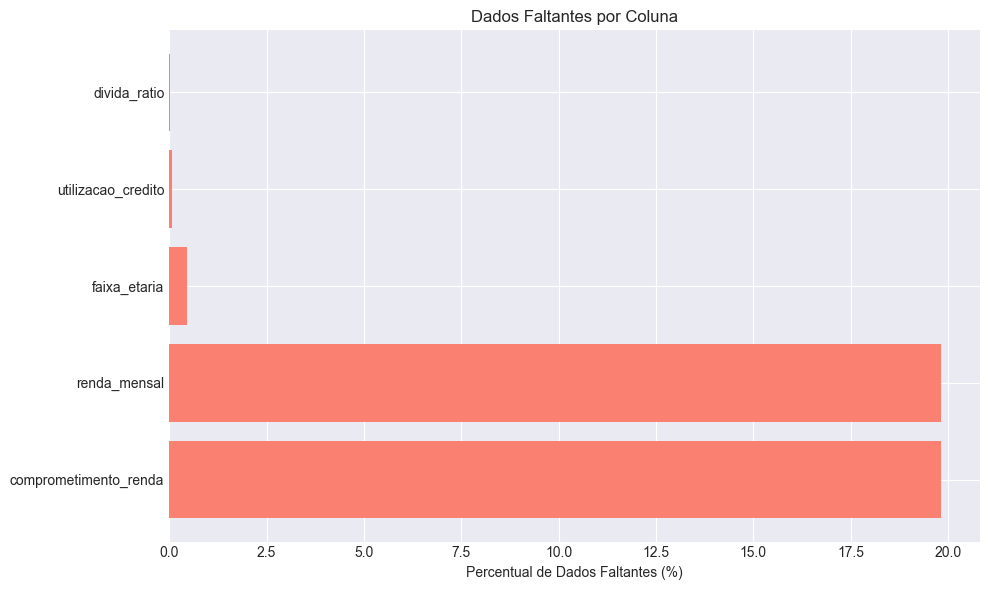

In [280]:
# Célula 5: Verificar valores ausentes
import matplotlib.pyplot as plt
import pandas as pd

print("=" * 80)
print("❓ ANÁLISE DE DADOS FALTANTES")
print("=" * 80)

# Criar DataFrame com contagem e percentual de valores ausentes
missing = (
    pd.DataFrame({
        "Coluna": df_raw.columns,
        "Missing": df_raw.isnull().sum(),
        "Percentual": (df_raw.isnull().sum() / len(df_raw) * 100).round(2)
    })
    .query("Missing > 0")  # filtra apenas colunas com valores ausentes
    .sort_values("Missing", ascending=False)
    .reset_index(drop=True)
)

# Exibir tabela ou mensagem
if not missing.empty:
    display(missing.style.background_gradient(cmap="Reds"))
    
    # Visualização gráfica
    plt.figure(figsize=(10, 6))
    plt.barh(missing["Coluna"], missing["Percentual"], color="salmon")
    plt.xlabel("Percentual de Dados Faltantes (%)")
    plt.title("Dados Faltantes por Coluna")
    plt.tight_layout()
    plt.show()
else:
    print("✅ Nenhum dado faltante encontrado!")


🎯 ANÁLISE DA VARIÁVEL TARGET: inadipl_90dias_ult2anos


,inadipl_90dias_ult2anos,Quantidade,Percentual (%)
0,False,139974,93.320000
1,True,10026,6.680000


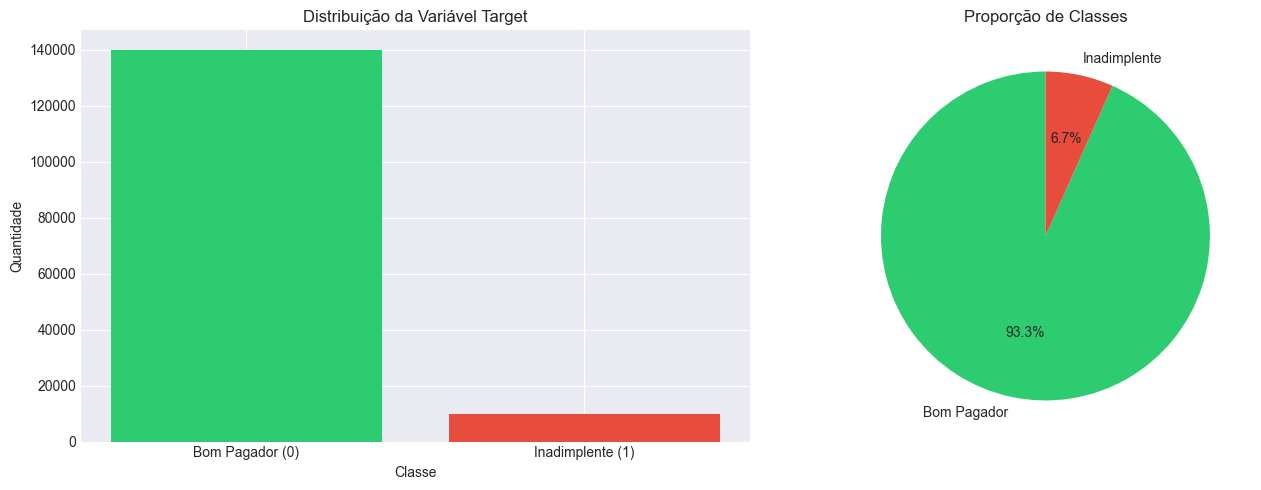


⚖️ Ratio de balanceamento: 1:14.0
   ⚠️ Dataset muito desbalanceado! Considerar técnicas de balanceamento.


In [282]:
# Célula 6: Analisar variável target (inadimplência)
# Ajuste 'SeriousDlqin2yrs' para o nome da sua variável target
target_col = "inadipl_90dias_ult2anos"  # ou 'default', 'target', etc.

print("=" * 80)
print(f"🎯 ANÁLISE DA VARIÁVEL TARGET: {target_col}")
print("=" * 80)

# Distribuição absoluta e percentual
target_dist = df_raw[target_col].value_counts()
target_pct = df_raw[target_col].value_counts(normalize=True).mul(100).round(2)

# Exibir tabela com estilo
target_summary = (
    pd.DataFrame({"Quantidade": target_dist, "Percentual (%)": target_pct})
    .reset_index()
    .rename(columns={"index": "Classe"})
)
display(target_summary.style.background_gradient(cmap="Blues"))

# Visualização
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Gráfico de barras
axes[0].bar(target_dist.index, target_dist.values, color=["#2ecc71", "#e74c3c"])
axes[0].set_xlabel("Classe")
axes[0].set_ylabel("Quantidade")
axes[0].set_title("Distribuição da Variável Target")
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(["Bom Pagador (0)", "Inadimplente (1)"])

# Gráfico de pizza
axes[1].pie(
    target_dist.values,
    labels=["Bom Pagador", "Inadimplente"],
    autopct="%1.1f%%",
    colors=["#2ecc71", "#e74c3c"],
    startangle=90,
)
axes[1].set_title("Proporção de Classes")

plt.tight_layout()
plt.show()

# Verificar desbalanceamento
ratio = target_dist.min() / target_dist.max()
print(f"\n⚖️ Ratio de balanceamento: 1:{1/ratio:.1f}")
if ratio < 0.1:
    print("   ⚠️ Dataset muito desbalanceado! Considerar técnicas de balanceamento.")


# 4.0.Limpeza e Transformação

In [268]:
df = df_raw.copy

In [ ]:
#filtrando renda_mensal que é ausente e ordenando por idade.
df[df['renda_mensal'].isnull()].sort_values(by='idade', ascending=False)


In [ ]:
df# filtrando e deletando dados em que a renda_mensal é nula e idade inferior a 18 e superior a 90.
df[(df['idade'] <=18) | (df_raw['idade']>= 90)]

df.drop(df[(df_raw['idade'] < 18) | (df_raw['idade'] >= 90)].index, inplace=True)



In [ ]:
# utilizacao_credito e divida_ratio está em decimal vou trasnforma em porcentagem para melhor analise.
#Multiplicar por 100 só faz sentido em relatórios ou dashboards, para exibir como porcentagem.
# lembrando que para o modelo deve se usar decimal.
df['utilizacao_credito'] = df['utilizacao_credito'] * 100
df['divida_ratio'] = df['divida_ratio'] * 100


In [ ]:
df.isna().sum()                   

In [262]:
# separando em outro dataframe para fazer a imputação com ML baseado em váriaveis correlacionadas.
df_raw_raw_sem_renda = df[df['renda_mensal'].isnull()] #  29.413 dados.

# apagando dados sem renda do dataframe
df = df.dropna(subset=['renda_mensal'])
df

# Consultando utilizacao_credito sem valores.
df[df['utilizacao_credito'].isnull()] 

# separando em outro dataframe para fazer a imputação com ML baseado em váriaveis correlacionadas.
df_utilizacao_credito_ausente = df[df['utilizacao_credito'].isnull()] # 89 dados.
# apagando dados sem renda do dataframe
df = df.dropna(subset=['utilizacao_credito'])

# separando em outro dataframe para fazer a imputação com ML baseado em váriaveis correlacionadas.
df_divida_ratio_ausente = df[df['divida_ratio'].isnull()]

# apagando dados sem renda do dataframe
df = df.dropna(subset=['divida_ratio'])

NameError: name 'df_raw' is not defined

In [ ]:
df

# 5.0.Analise Descritiva


## 5.1 Perfil sociodemográfico

### Distribuição da idade

📊 Analisando 11 variáveis numéricas


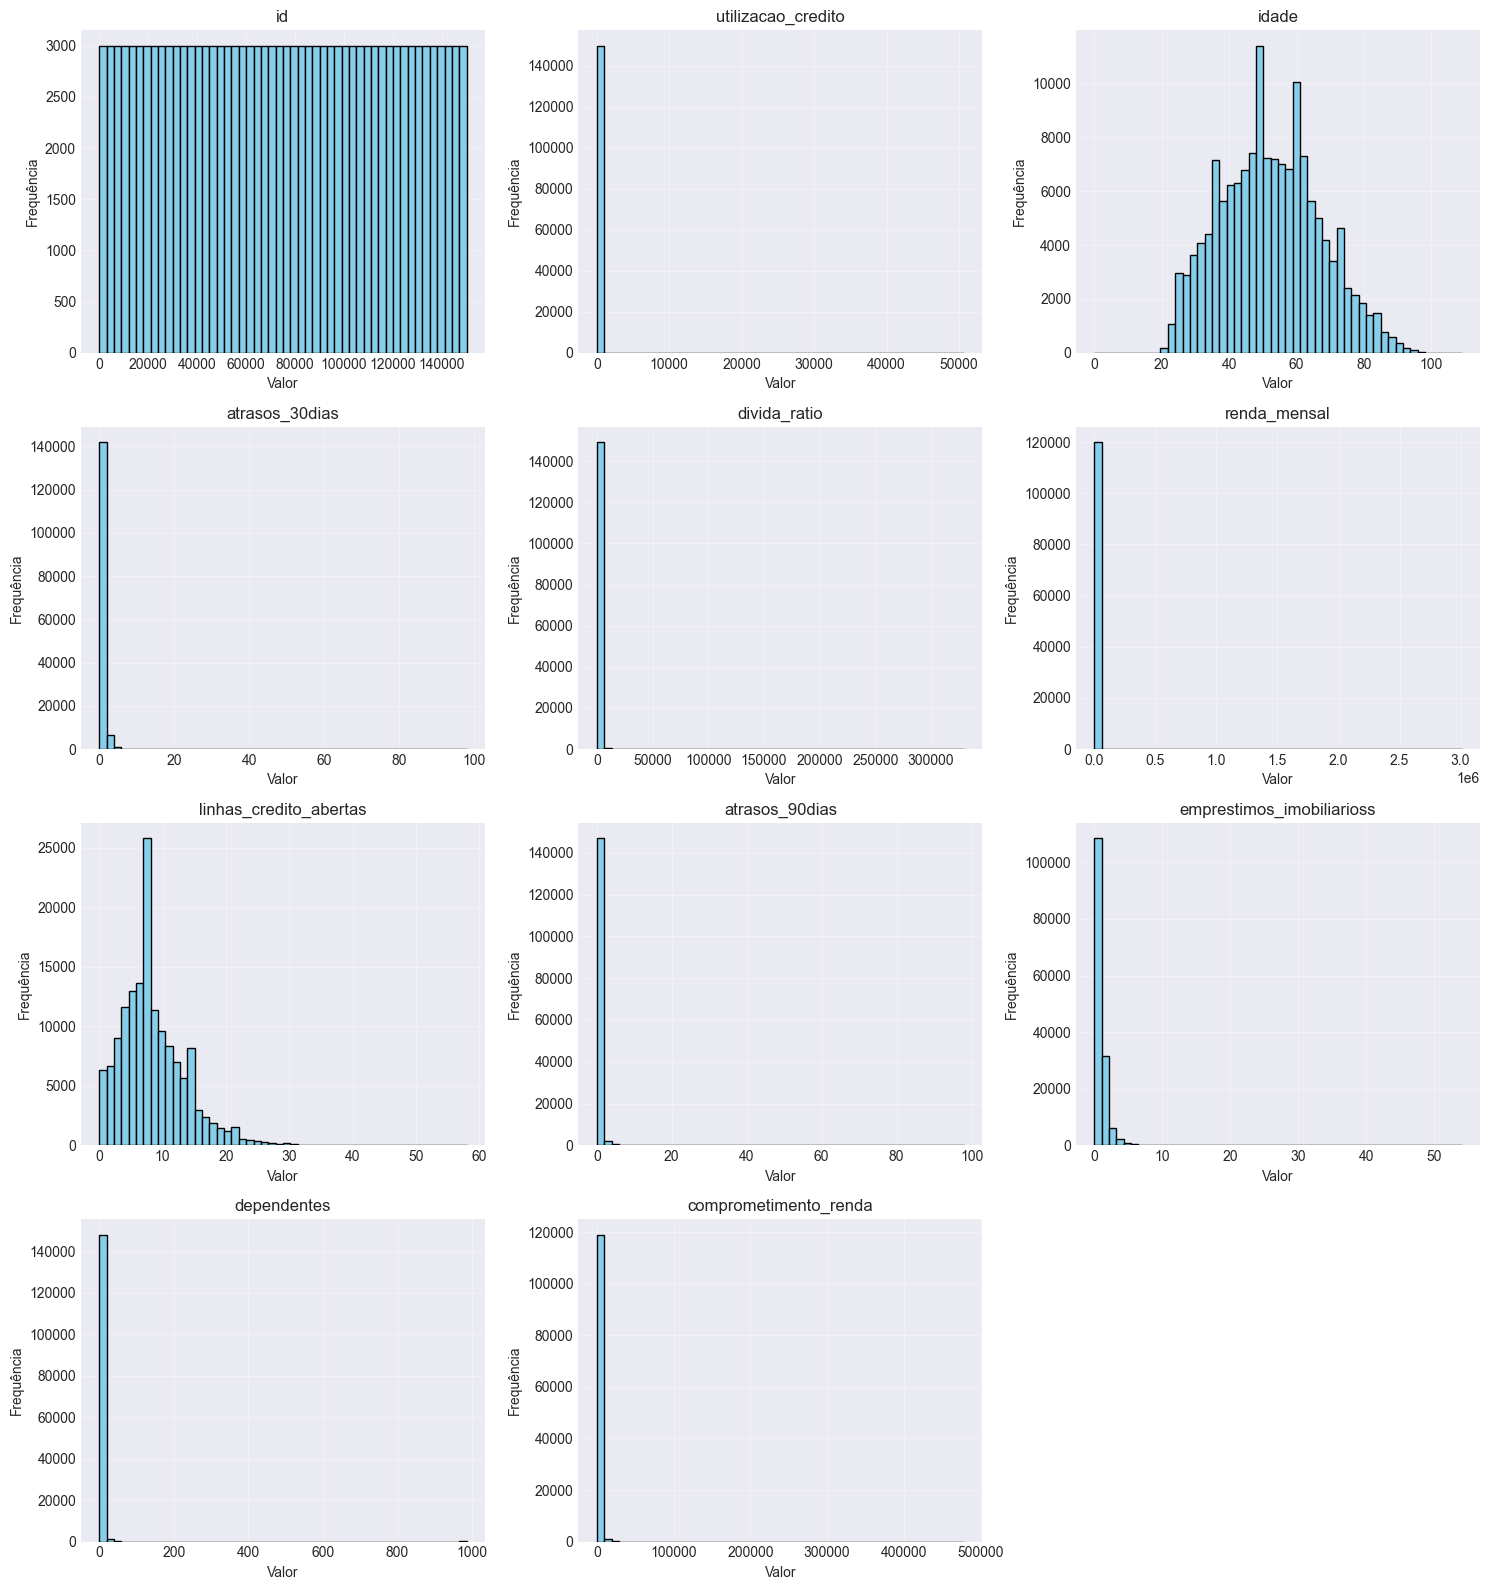

In [283]:
# Célula 7: Distribuição das variáveis numéricas
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Selecionar colunas numéricas (excluindo a variável target)
numeric_cols = df_raw.select_dtypes(include=[np.number]).columns.tolist()
if target_col in numeric_cols:
    numeric_cols.remove(target_col)

print(f"📊 Analisando {len(numeric_cols)} variáveis numéricas")

# Definir número de colunas e linhas para subplots
n_cols = 3
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))
axes = axes.flatten()

# Criar histogramas para cada variável numérica
for idx, col in enumerate(numeric_cols):
    df_raw[col].dropna().hist(bins=50, ax=axes[idx], color="skyblue", edgecolor="black")
    axes[idx].set_title(col)
    axes[idx].set_xlabel("Valor")
    axes[idx].set_ylabel("Frequência")
    axes[idx].grid(alpha=0.3)

# Remover eixos extras
for idx in range(len(numeric_cols), len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.show()


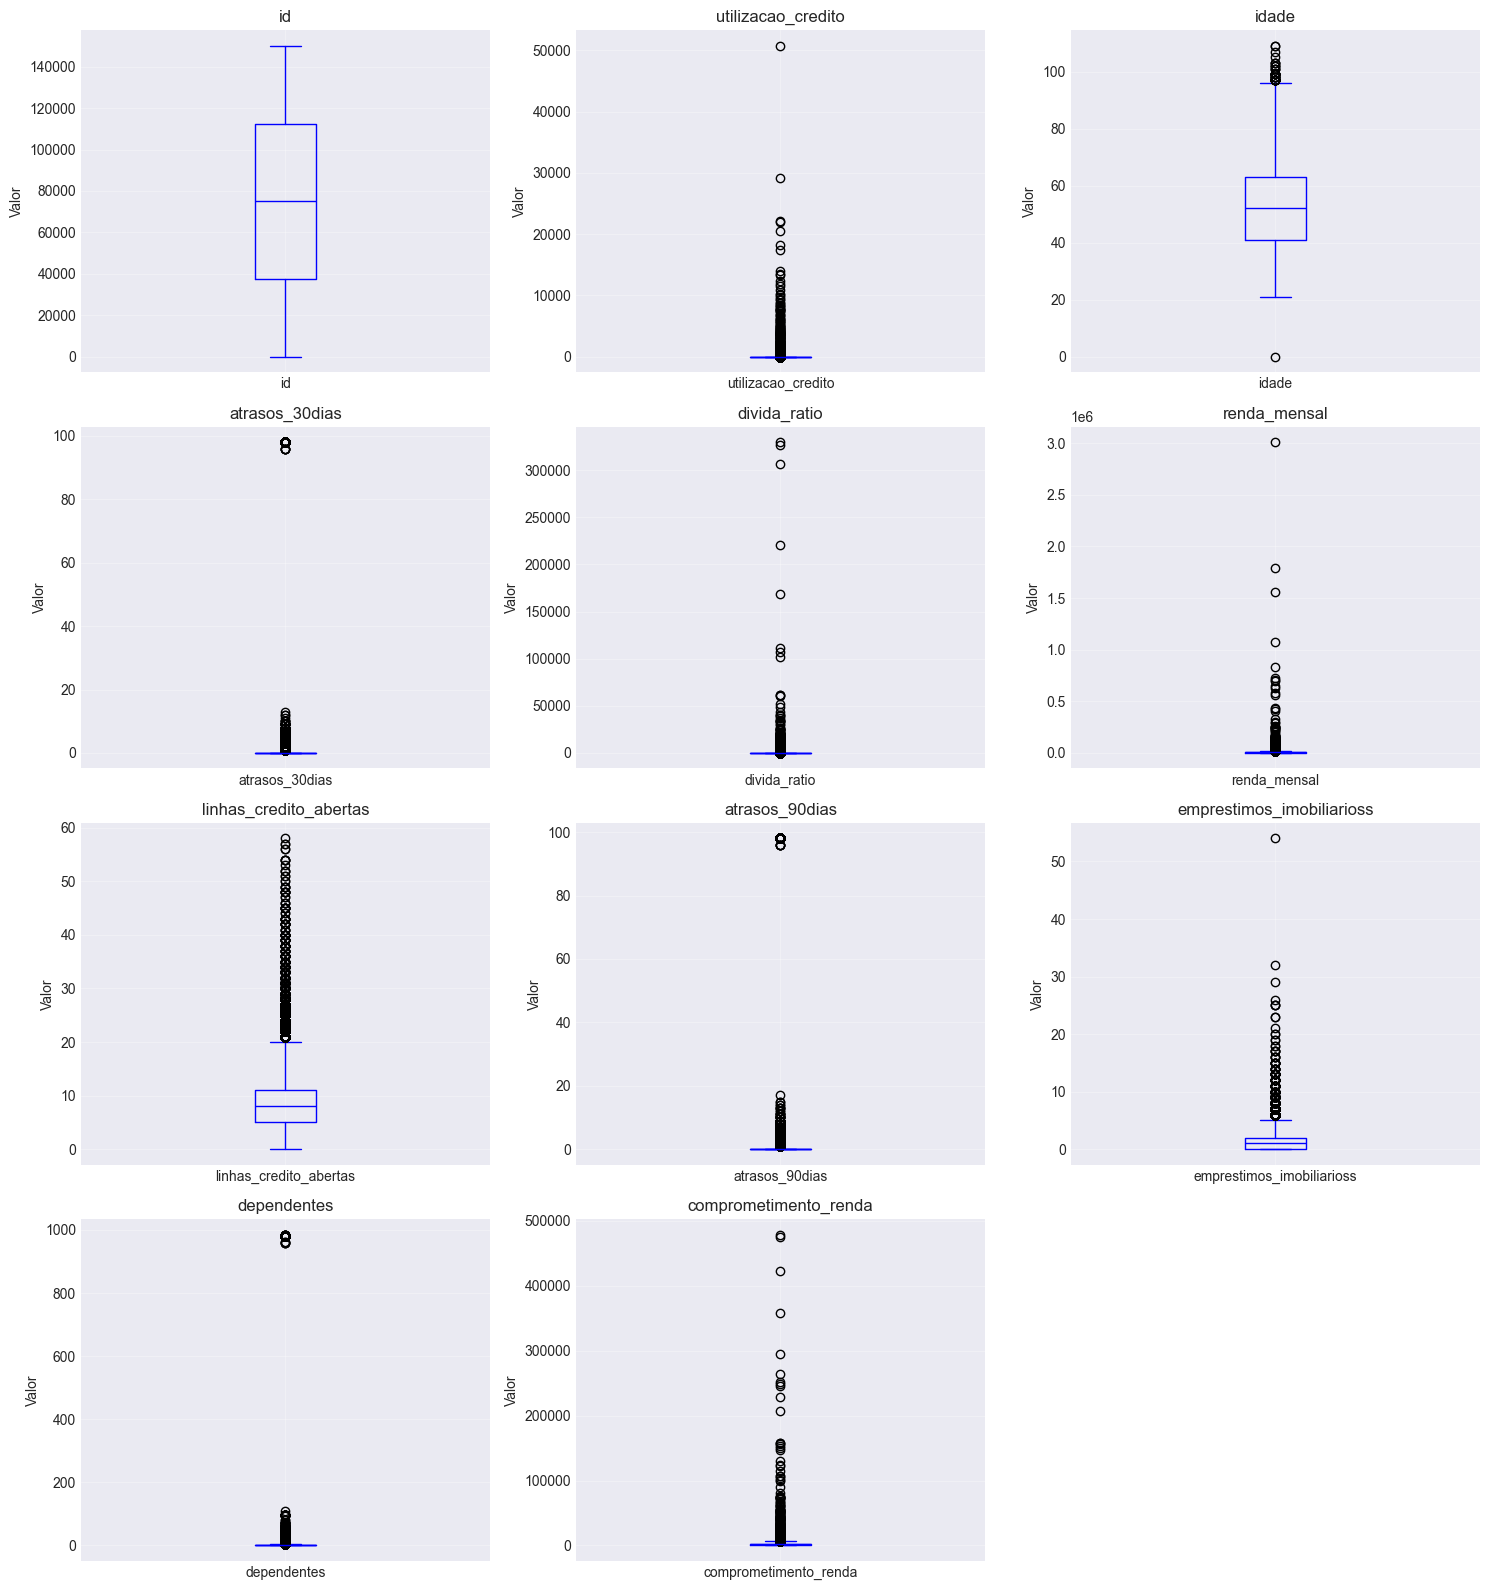

In [284]:
# Célula 8: Boxplots para identificar outliers
# Definir número de colunas e linhas para subplots
n_cols = 3
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))
axes = axes.flatten()

# Criar boxplots para cada variável numérica
for idx, col in enumerate(numeric_cols):
    df_raw[col].dropna().plot.box(ax=axes[idx], vert=True, color="blue")
    axes[idx].set_title(col)
    axes[idx].set_ylabel("Valor")
    axes[idx].grid(alpha=0.3)

# Remover eixos extras
for idx in range(len(numeric_cols), len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.show()


## 5.2 Capacidade Financeira

In [257]:
df[df['comprometimento_renda'] > 200000]

,id,inadipl_90dias_ult2anos,utilizacao_credito,idade,atrasos_30dias,divida_ratio,renda_mensal,linhas_credito_abertas,atrasos_90dias,emprestimos_imobiliarioss,dependentes,comprometimento_renda,faixa_etaria
32534,32535,False,6.75,76,0,4417.37,5993.0,16,0,0,1,264732.98,60+
34109,34110,False,0.00,63,5,3032.65,8300.0,16,1,2,10,251709.95,60+
55486,55487,False,22.86,65,0,6571.22,7223.0,14,0,0,0,474639.22,60+
80263,80264,False,16.13,31,1,3361.10,6166.0,14,0,2,2,207245.43,26-35
96899,96900,False,0.45,74,0,3820.11,6000.0,6,0,0,0,229206.60,60+
106066,106067,True,91.07,69,5,9530.09,2601.0,14,1,2,51,247877.64,60+


In [253]:
df_renda_acima_100000 = df[df['renda_mensal'] > 100000]
df.drop(df[df['renda_mensal'] > 10000].index, inplace=True)

df_renda_menor_1400 = df[df['renda_mensal'] < 1400]
df.drop(df[df['renda_mensal'] < 1400].index, inplace=True)


In [163]:
#from scipy.stats.mstats import winsorize

# Copiar a coluna para não alterar o original
#renda = df['renda_mensal'].copy()

# Winsorization: corta 1% dos valores mais baixos e 1% dos mais altos
# Ajuste os limites conforme sua necessidade (ex: 0.01 = 1%)
#renda_wins = winsorize(renda, limits=[0.05, 0.0]) 

# Substituir no dataframe
#df['renda_mensal_wins'] = renda_wins

# Comparar estatísticas antes e depois
#print("Antes:\n", df['renda_mensal'].describe())
#print("\nDepois:\n", df['renda_mensal_wins'].describe())


Antes:
 count    119789.000000
mean       6608.235264
std        8691.933455
min           0.000000
25%        3400.000000
50%        5400.000000
75%        8250.000000
max      835040.000000
Name: renda_mensal, dtype: float64

Depois:
 count    119789.000000
mean       6497.111755
std        4932.165437
min        1300.000000
25%        3400.000000
50%        5400.000000
75%        8250.000000
max       45000.000000
Name: renda_mensal_wins, dtype: float64


### Comprometimento da renda

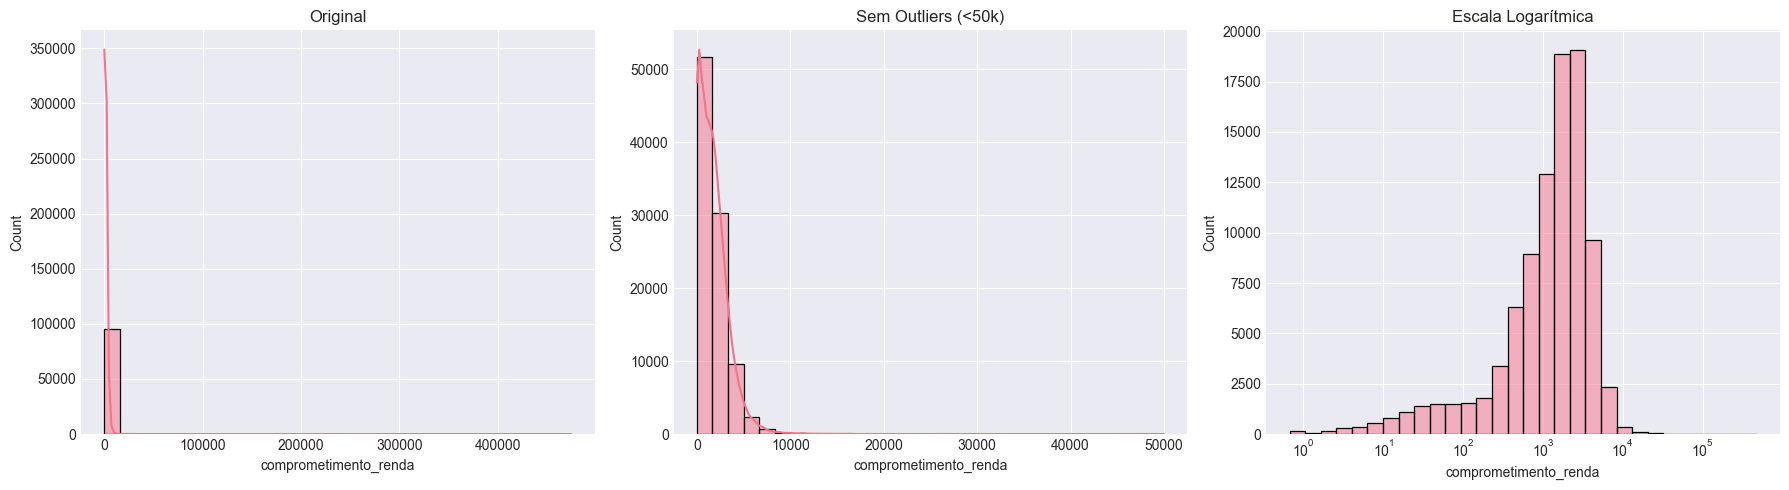

In [258]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# 1. Original
sns.histplot(df['comprometimento_renda'], bins=30, kde=True, ax=axes[0])
axes[0].set_title("Original")

# 2. Sem outliers (exemplo: abaixo de 50 mil)
sns.histplot(df[df['comprometimento_renda'] < 50000]['comprometimento_renda'], bins=30, kde=True, ax=axes[1])
axes[1].set_title("Sem Outliers (<50k)")

# 3. Escala logarítmica
sns.histplot(df['comprometimento_renda'], bins=30, kde=True, log_scale=True, ax=axes[2])
axes[2].set_title("Escala Logarítmica")

plt.tight_layout()
plt.show()


### Divida ratio

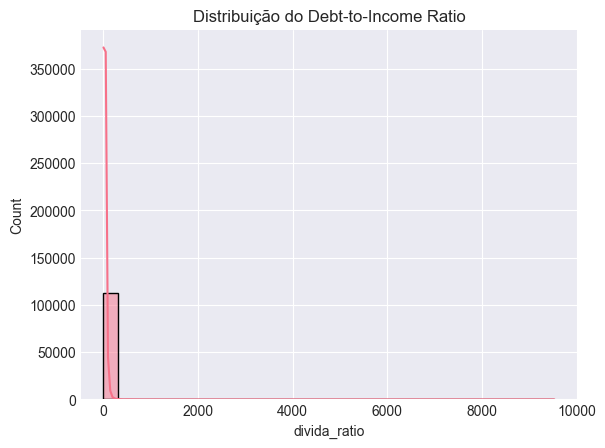

In [248]:
sns.histplot(df['divida_ratio'], bins=30, kde=True)
plt.title("Distribuição do Debt-to-Income Ratio")
plt.show()

## 5.3 Comportamento de crédito

### Utilização de crédito

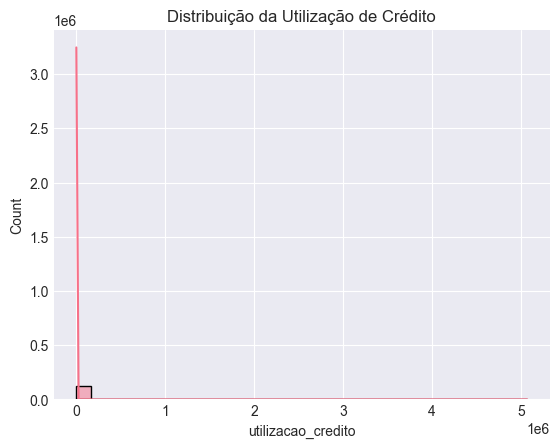

In [176]:
sns.histplot(df['utilizacao_credito'], bins=30, kde=True)
plt.title("Distribuição da Utilização de Crédito") 
plt.show()

## 5.4 Histórico de inadimplência

### Variável derivada: inadimplência histórica

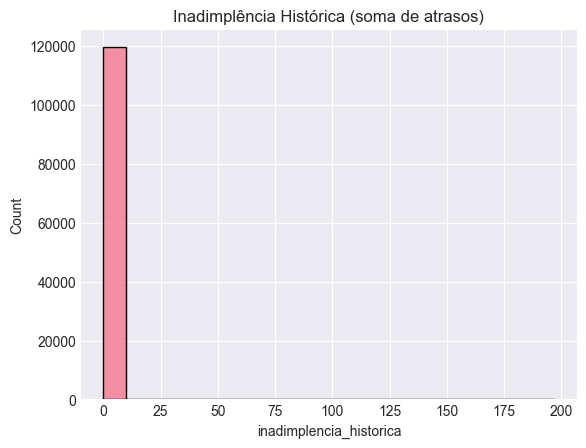

In [182]:
df['inadimplencia_historica'] = ( df['atrasos_30dias'].fillna(0) + df['atrasos_90dias'].fillna(0) + df['inadipl_90dias_ult2anos'].fillna(0) )
sns.histplot(df['inadimplencia_historica'], bins=20)
plt.title("Inadimplência Histórica (soma de atrasos)")
plt.show()

## 5.5 Correlações

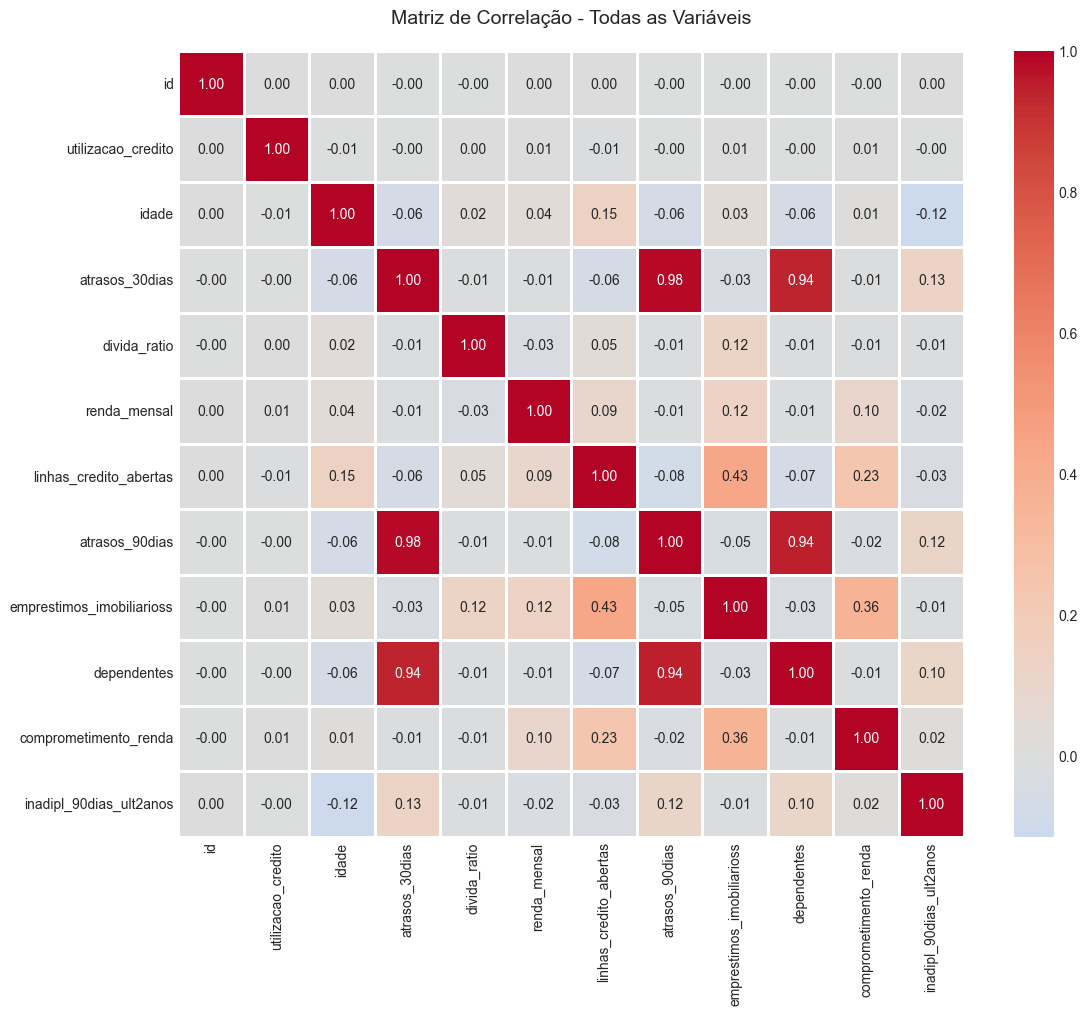


🎯 Correlação com a variável target:


,Correlação
inadipl_90dias_ult2anos,1.000000
atrasos_30dias,0.125587
atrasos_90dias,0.117175
dependentes,0.103533
comprometimento_renda,0.022306
id,0.002801
utilizacao_credito,-0.001805
emprestimos_imobiliarioss,-0.007038
divida_ratio,-0.007608
renda_mensal,-0.019746


In [286]:
# Célula 9: Matriz de correlação

# Calcular correlação
corr_matrix = df_raw[numeric_cols + [target_col]].corr()

# Visualizar matriz de correlação com heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    center=0,
    square=True,
    linewidths=1
)
plt.title("Matriz de Correlação - Todas as Variáveis", fontsize=14, pad=20)
plt.tight_layout()
plt.show()

# Correlação com a variável target
print("\n🎯 Correlação com a variável target:")
target_corr = corr_matrix[target_col].sort_values(ascending=False)

# Exibir tabela estilizada
display(
    target_corr.to_frame(name="Correlação")
    .style.background_gradient(cmap="RdBu", vmin=-1, vmax=1)
)
